In [1]:
#import needed libraries
import numpy as np #for numerical operations
import pandas as pd #for file operations
import matplotlib.pyplot as plt #for plotting graphs
import seaborn as sns #also for plotting graphs
from sklearn.linear_model import LinearRegression #for machine learning 
from sklearn import metrics #for testing the machine learning model

In [2]:
# Importing the dataset
dataset = pd.read_csv('mean-air-temperature.csv')

In [3]:
dataset.head() #show the first 5 rows of the dataset

,year,total_precipitation,mean_wind_speed,mean_relative_humidity,percentage_possible_sunshine,total_sunshine_duration,solar_radiation,mean_air_temperature
0,Jan-10,90.0,5.0,67,28,92.7,9.1,16.8
1,Feb-10,276.5,5.6,77,22,69.5,9.2,18.3
2,Mar-10,41.5,5.8,71,36,134.9,14.2,19.9
3,Apr-10,219.0,5.4,76,21,81.3,13.4,21.2
4,May-10,574.5,5.1,79,27,111.8,14.8,23.8


In [4]:
X = dataset.iloc[:, 1:-1].values #select All rows, all columns excluding the first and the last column
y = dataset.iloc[:, -1].values #select All rows, last column

dates = dataset.iloc[:,0] #store the dates from the dataset (first column) in a variable, to be used when plotting graphs

In [5]:
#train a linear regression model on the data
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [6]:
#find the coefficient of determination to see how well the model performs
r_sq = model.score(X, y)
print('coefficient of determination: ', r_sq)

coefficient of determination:  0.8798753603082808


In [7]:
y_pred = model.predict(X) #using the trained model, try to predict outcomes
print('predicted response: ', y_pred, sep='\n') #display predictions

predicted response: 
[18.45228932 21.05087191 21.3364593  20.11789206 24.75356554 24.35976844
 25.78812758 27.39006863 27.8625716  23.38667344 19.35888791 19.59138985
 16.10005962 20.07797299 15.79242828 23.27092145 23.33238247 29.18059196
 30.01166562 30.25159848 27.0754072  23.52445342 21.65542469 17.8930137
 17.66336971 18.3945669  20.90153192 21.75986416 23.87335949 26.61109429
 29.7595676  29.71199872 25.47175358 23.4624275  20.45698973 18.38905718
 18.43834229 20.84864342 22.6685266  20.15749922 24.18140394 28.38491186
 28.9008601  29.6125076  27.19319882 22.83453714 19.96445762 17.71697206
 19.81759177 19.70191148 19.96747355 22.47103886 24.06032627 26.91342584
 31.99439709 27.81226243 27.97467875 25.09605988 21.06427741 16.76068161
 16.19670401 18.40436933 21.26084425 21.67777458 24.96619609 29.47971129
 29.00637447 26.6703748  26.0215937  23.17061949 22.596352   19.53018522
 19.90614678 17.36789869 19.97162321 25.23407286 24.91188732 28.60390466
 29.88119234 28.13255922 25.329

In [8]:
#model evauluation metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))

Mean Absolute Error: 1.266574541712815
Mean Squared Error: 2.332488074556817
Root Mean Squared Error: 1.5272485307103152


Text(0.5, 1.0, 'Mean air temperature - actual and predicted values')

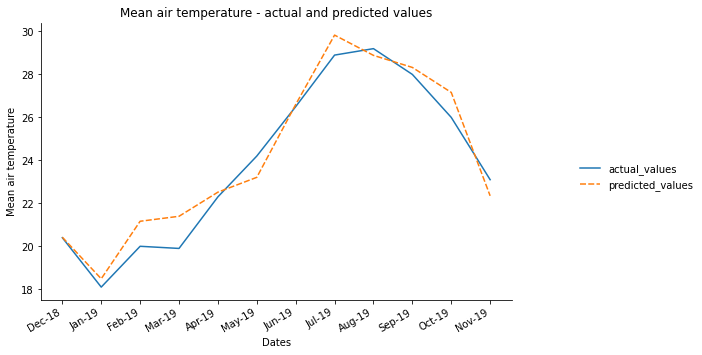

In [9]:
df = pd.DataFrame(dict(actual_values=y[-13:-1], predicted_values=y_pred[-13:-1]), index=dates[-13:-1]) #create a dataframe containing the last 12 actual and predicted values with the month and year as the index of the dataframe
g = sns.relplot(kind="line", data=df) #plot a line graph using the dataframe
g.fig.autofmt_xdate() #adjust the size of the x-axis so the dates have some spacing
g.fig.set_size_inches(10, 5) #set the size of the figure
plt.xlabel('Dates') #set the label for the x-axis
plt.ylabel('Mean air temperature') #set the label for the y-axis
plt.title('Mean air temperature - actual and predicted values') #set the title of the graph